In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
os.getcwd()

'/Users/chandanshashwat/Desktop/DataSet'

In [3]:
df_original = pd.read_csv('train_data.csv')

In [4]:
df = df_original.copy()

In [5]:
df.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,0,Public Sector,NaN,Male,High School Equivalent,Single,0.0,3.18,IHG,23.0,No,7,Yes,Medical Tourism,1433.147527,Bronze
1,1,Private Sector,NaN,NaN,Associate Degree,Married,1.0,2.07,IHG,48.0,No,4,Yes,Leisure Travel,38.379023,Silver
2,2,Business,44.0,Female,Masters Degree,Married,NaN,2.81,Discovery,32.0,No,1,No,Leisure Travel,0.000000,Bronze
3,3,Public Sector,NaN,Male,Bachelors Degree,Single,0.0,3.46,IHG,6.0,No,16,Yes,Medical Tourism,0.000000,Bronze
4,4,Business,NaN,Female,Bachelors Degree,Widowed,NaN,3.21,Marriott,NaN,Yes,0,No,Business,764.418767,Silver


In [6]:
df.shape

(10000, 16)

In [7]:
df.loyaltyClass.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [8]:
df.loyaltyClass.value_counts()

Silver    5665
Bronze    3998
Gold       337
Name: loyaltyClass, dtype: int64

In [9]:
df.isnull().sum()

ID                    0
profession          493
age                4178
gender             2579
highestDegree         0
maritalStatus         0
noOfKids           4533
creditRisk            0
otherMembership       0
pastStays1y         950
blogger               0
articles              0
amexCard              0
purposeTravel         0
staySpend             0
loyaltyClass          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10000 non-null  int64  
 1   profession       9507 non-null   object 
 2   age              5822 non-null   float64
 3   gender           7421 non-null   object 
 4   highestDegree    10000 non-null  object 
 5   maritalStatus    10000 non-null  object 
 6   noOfKids         5467 non-null   float64
 7   creditRisk       10000 non-null  float64
 8   otherMembership  10000 non-null  object 
 9   pastStays1y      9050 non-null   float64
 10  blogger          10000 non-null  object 
 11  articles         10000 non-null  int64  
 12  amexCard         10000 non-null  object 
 13  purposeTravel    10000 non-null  object 
 14  staySpend        10000 non-null  float64
 15  loyaltyClass     10000 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 1.2+ MB


In [11]:
df.nunique()

ID                 10000
profession             4
age                   43
gender                 2
highestDegree          8
maritalStatus          4
noOfKids               5
creditRisk           268
otherMembership        7
pastStays1y           50
blogger                2
articles              21
amexCard               2
purposeTravel          3
staySpend           5656
loyaltyClass           3
dtype: int64

In [12]:
df = df.drop(columns='ID')

In [13]:
df['age'].fillna(df['age'].median(), inplace=True)
df['gender'].fillna(df['gender'].mode(), inplace=True)
df['noOfKids'].fillna(df['noOfKids'].median(), inplace=True)
df['pastStays1y'].fillna(df['pastStays1y'].median(), inplace=True)

In [14]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['profession'] = df['profession'].fillna(df['profession'].mode()[0])

In [15]:
df.isnull().sum()

profession         0
age                0
gender             0
highestDegree      0
maritalStatus      0
noOfKids           0
creditRisk         0
otherMembership    0
pastStays1y        0
blogger            0
articles           0
amexCard           0
purposeTravel      0
staySpend          0
loyaltyClass       0
dtype: int64

In [16]:
df.noOfKids.value_counts()

1.0    6785
0.0    2441
3.0     400
2.0     198
4.0     176
Name: noOfKids, dtype: int64

In [17]:
df[df == 0].count()

profession            0
age                   0
gender                0
highestDegree         0
maritalStatus         0
noOfKids           2441
creditRisk            0
otherMembership       0
pastStays1y         162
blogger               0
articles           2982
amexCard              0
purposeTravel         0
staySpend          4345
loyaltyClass          0
dtype: int64

In [18]:
df.describe()

,age,noOfKids,creditRisk,pastStays1y,articles,staySpend
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.058500,0.908500,2.889681,24.746000,7.407800,1950.964931
std,9.470029,0.757618,0.492806,13.690713,6.816183,5551.342403
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,36.000000,1.000000,2.560000,14.000000,0.000000,0.000000
50%,39.000000,1.000000,2.890000,25.000000,6.000000,0.267470
75%,42.000000,1.000000,3.230000,36.000000,13.000000,781.467816
max,60.000000,4.000000,4.000000,49.000000,20.000000,75553.558890


In [19]:
#as we can see the half of the day spend value is 0
df.staySpend.median()

0.2674697065

In [20]:
staySpend_mean = df['staySpend'].mean(skipna=True)
print(staySpend_mean)
df['staySpend']=df['staySpend'].replace(0,staySpend_mean) 

1950.9649312348436


Text(0, 0.5, 'staySpend')

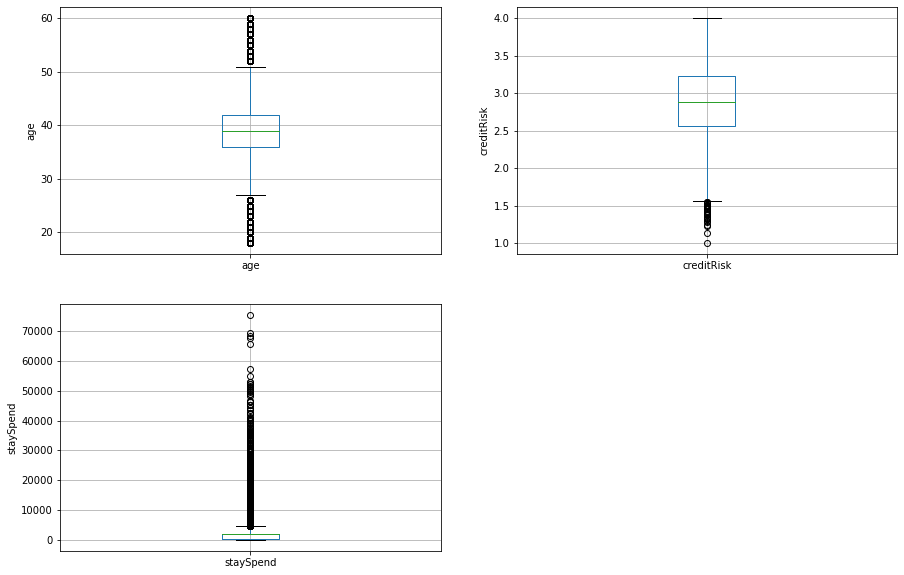

In [21]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='creditRisk')
fig.set_title('')
fig.set_ylabel('creditRisk')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='staySpend')
fig.set_title('')
fig.set_ylabel('staySpend')

Text(0.5, 0, 'staySpend')

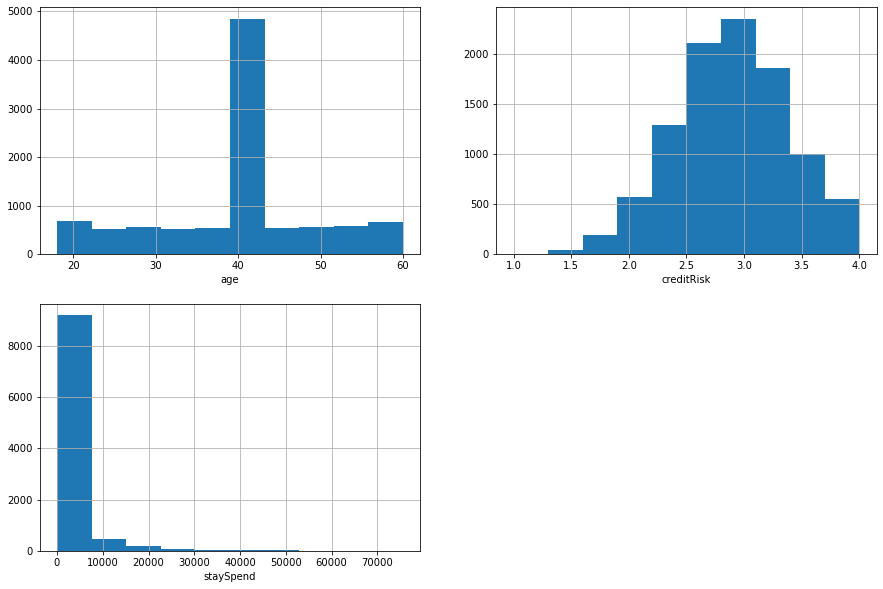

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.age.hist(bins=10)
fig.set_xlabel('age')

plt.subplot(2, 2, 2)
fig = df.creditRisk.hist(bins=10)
fig.set_xlabel('creditRisk')

plt.subplot(2, 2, 3)
fig = df.staySpend.hist(bins=10)
fig.set_xlabel('staySpend')

In [23]:
Q1 = df['staySpend'].quantile(0.10)
Q3 = df['staySpend'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['staySpend'][(df['staySpend']>upper_whisker)|(df['staySpend']<lower_whisker)].index
print(index)

Int64Index([  42,   85,  111,  172,  207,  210,  230,  267,  276,  283,
            ...
            9740, 9753, 9813, 9814, 9826, 9861, 9869, 9927, 9958, 9977],
           dtype='int64', length=364)


In [24]:
df.loc[index,'staySpend'] = df.staySpend.median()f

In [25]:
Q1 = df['creditRisk'].quantile(0.10)
Q3 = df['creditRisk'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['creditRisk'][(df['creditRisk']>upper_whisker)|(df['creditRisk']<lower_whisker)].index

In [26]:
Q1 = df['age'].quantile(0.10)
Q3 = df['age'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['age'][(df['age']>upper_whisker)|(df['age']<lower_whisker)].index
print(index)

Int64Index([], dtype='int64')


Text(0.5, 0, 'staySpend')

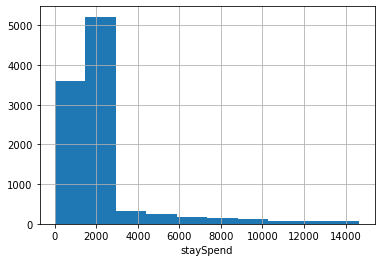

In [27]:
fig = df.staySpend.hist(bins=10)
fig.set_xlabel('staySpend')

In [28]:
# features = ["staySpend"]
# autoscaler = StandardScaler()
# df[features] = autoscaler.fit_transform(df[features])

In [29]:
df

,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,Public Sector,39.0,Male,High School Equivalent,Single,0.0,3.18,IHG,23.0,No,7,Yes,Medical Tourism,1.433148e+03,Bronze
1,Private Sector,39.0,Female,Associate Degree,Married,1.0,2.07,IHG,48.0,No,4,Yes,Leisure Travel,3.837902e+01,Silver
2,Business,44.0,Female,Masters Degree,Married,1.0,2.81,Discovery,32.0,No,1,No,Leisure Travel,1.950965e+03,Bronze
3,Public Sector,39.0,Male,Bachelors Degree,Single,0.0,3.46,IHG,6.0,No,16,Yes,Medical Tourism,1.950965e+03,Bronze
4,Business,39.0,Female,Bachelors Degree,Widowed,1.0,3.21,Marriott,25.0,Yes,0,No,Business,7.644188e+02,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Private Sector,39.0,Female,Bachelors Degree,Married,1.0,2.55,IHG,12.0,Yes,0,No,Leisure Travel,1.950965e+03,Silver
9996,Private Sector,39.0,Female,High School Equivalent,Married,1.0,2.73,IHG,9.0,No,4,Yes,Medical Tourism,9.387970e-07,Silver
9997,Private Sector,58.0,Female,MBA,Single,0.0,3.02,Discovery,48.0,No,5,No,Business,3.118682e+02,Bronze
9998,Private Sector,27.0,Female,High School Equivalent,Single,0.0,1.50,Jumeirah,40.0,No,4,No,Business,8.269680e-05,Silver


In [30]:
#Correlation 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,noOfKids,creditRisk,pastStays1y,articles,staySpend
age,1.000000,-0.017737,-0.009268,0.002849,-0.015752,0.008213
noOfKids,-0.017737,1.000000,-0.003528,0.006745,0.002385,-0.008729
creditRisk,-0.009268,-0.003528,1.000000,0.002420,-0.006851,0.010454
pastStays1y,0.002849,0.006745,0.002420,1.000000,-0.005491,-0.010908
articles,-0.015752,0.002385,-0.006851,-0.005491,1.000000,0.003064
staySpend,0.008213,-0.008729,0.010454,-0.010908,0.003064,1.000000


In [31]:
# H0: The variables are not correlated with each other.
from scipy.stats import chi2_contingency
CrosstabResult=pd.crosstab(index=df['age'],columns=df['gender'])
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.5100090416739632


In the above example, the P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other.

In [32]:
categorical_columns = ['gender', 'highestDegree', 'maritalStatus', 'noOfKids', 'otherMembership', 'blogger', 'articles', 'amexCard', 'purposeTravel']
df_categorical = df[['profession', 'gender', 'highestDegree', 'maritalStatus', 'noOfKids', 'otherMembership', 'blogger', 'articles', 'amexCard', 'purposeTravel']]
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df_categorical['profession'], df_categorical[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

            Column                      Hypothesis
0           gender  Fail to Reject Null Hypothesis
1    highestDegree  Fail to Reject Null Hypothesis
2    maritalStatus  Fail to Reject Null Hypothesis
3         noOfKids  Fail to Reject Null Hypothesis
4  otherMembership  Fail to Reject Null Hypothesis
5          blogger  Fail to Reject Null Hypothesis
6         articles  Fail to Reject Null Hypothesis
7         amexCard  Fail to Reject Null Hypothesis
8    purposeTravel  Fail to Reject Null Hypothesis


#we can see the categorical fetaures are not correlated


In [33]:
#Feature selection 
# 1. low varience check
df_continuous = df[['creditRisk', 'pastStays1y', 'staySpend']]
sel = VarianceThreshold(threshold=0.1)
sel.fit_transform(df_continuous)[:2]

array([[   3.18      ,   23.        , 1433.147527  ],
       [   2.07      ,   48.        ,   38.37902273]])

no columns are removed so no low varience detected 

In [34]:
# le = LabelEncoder()
# df['profession']= le.fit_transform(df['profession'])
# df['gender']= le.fit_transform(df['gender'])
# df['highestDegree']= le.fit_transform(df['highestDegree'])
# df['maritalStatus']= le.fit_transform(df['maritalStatus'])
# df['noOfKids']= le.fit_transform(df['noOfKids'])
# df['otherMembership']= le.fit_transform(df['otherMembership'])
# df['blogger']= le.fit_transform(df['blogger'])
# df['articles']= le.fit_transform(df['articles'])
# df['amexCard']= le.fit_transform(df['amexCard'])
# df['purposeTravel']= le.fit_transform(df['purposeTravel'])



prof_df = pd.get_dummies(df.profession, prefix='profession')
#df = pd.concat([df, prof_df], axis=1).drop(['profession'], axis=1)

gender_df = pd.get_dummies(df.gender, prefix='gender')
#df = pd.concat([df, gender_df], axis=1).drop(['gender'], axis=1)

highd_df = pd.get_dummies(df.highestDegree, prefix='highestDegree')
#df = pd.concat([df, prof_df], axis=1).drop(['highestDegree'], axis=1)

maritst_df = pd.get_dummies(df.profession, prefix='maritalStatus')
#df = pd.concat([df, prof_df], axis=1).drop(['maritalStatus'], axis=1)

nok_df = pd.get_dummies(df.noOfKids, prefix='noOfKids')
#df = pd.concat([df, prof_df], axis=1).drop(['noOfKids'], axis=1)
om_df = pd.get_dummies(df.otherMembership, prefix='otherMembership')
#df = pd.concat([df, prof_df], axis=1).drop(['otherMembership'], axis=1)
blogger_df = pd.get_dummies(df.blogger, prefix='blogger')
#df = pd.concat([df, prof_df], axis=1).drop(['blogger'], axis=1)
article_df = pd.get_dummies(df.articles, prefix='articles')
#df = pd.concat([df, prof_df], axis=1).drop(['articles'], axis=1)
amxcard_df = pd.get_dummies(df.amexCard, prefix='amexCard')
#df = pd.concat([df, prof_df], axis=1).drop(['amexCard'], axis=1)
pt_df = pd.get_dummies(df.purposeTravel, prefix='purposeTravel')

df = pd.concat([df, prof_df, gender_df, highd_df, maritst_df, nok_df, om_df, blogger_df, article_df, 
                amxcard_df, pt_df ], axis=1).drop(['profession','gender', 'highestDegree', 'maritalStatus', 
                                                   'noOfKids', 'otherMembership', 'blogger', 'purposeTravel',
                                                  'articles', 'amexCard' ], axis=1)

In [35]:
df.head(2)

,age,creditRisk,pastStays1y,staySpend,loyaltyClass,profession_Business,profession_Private Sector,profession_Public Sector,profession_Self-Employed,gender_Female,...,articles_16,articles_17,articles_18,articles_19,articles_20,amexCard_No,amexCard_Yes,purposeTravel_Business,purposeTravel_Leisure Travel,purposeTravel_Medical Tourism
0,39.0,3.18,23.0,1433.147527,Bronze,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,39.0,2.07,48.0,38.379023,Silver,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [36]:
df.loyaltyClass.value_counts()

Silver    5665
Bronze    3998
Gold       337
Name: loyaltyClass, dtype: int64

In [37]:
le = LabelEncoder()
y = le.fit_transform(df['loyaltyClass'])
df = df.drop(columns=['loyaltyClass'], axis=1)
x = df
print(y)

[0 2 0 ... 0 2 2]


In [38]:
le.inverse_transform(y) #0 is bronze, and 2 is Silver and 1 is gold 

array(['Bronze', 'Silver', 'Bronze', ..., 'Bronze', 'Silver', 'Silver'],
      dtype=object)

In [39]:
#LDA to sepearte the class distance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(x, y)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.20, random_state=42)

In [41]:
#Generating synthatic data since class Gold has less data
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [42]:
x_train_res.size

27108

In [43]:
print(np.count_nonzero(y_train_res == 0))
print(np.count_nonzero(y_train_res == 1))
print(np.count_nonzero(y_train_res == 2))
print(y_train_res.shape)

4518
4518
4518
(13554,)


In [44]:
logreg = LogisticRegression(C=100, multi_class='multinomial')
logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=100, multi_class='multinomial')

In [45]:
y_pred_test = logreg.predict(x_test)

In [46]:
y_pred_test

array([2, 0, 2, ..., 2, 1, 0])

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.4615


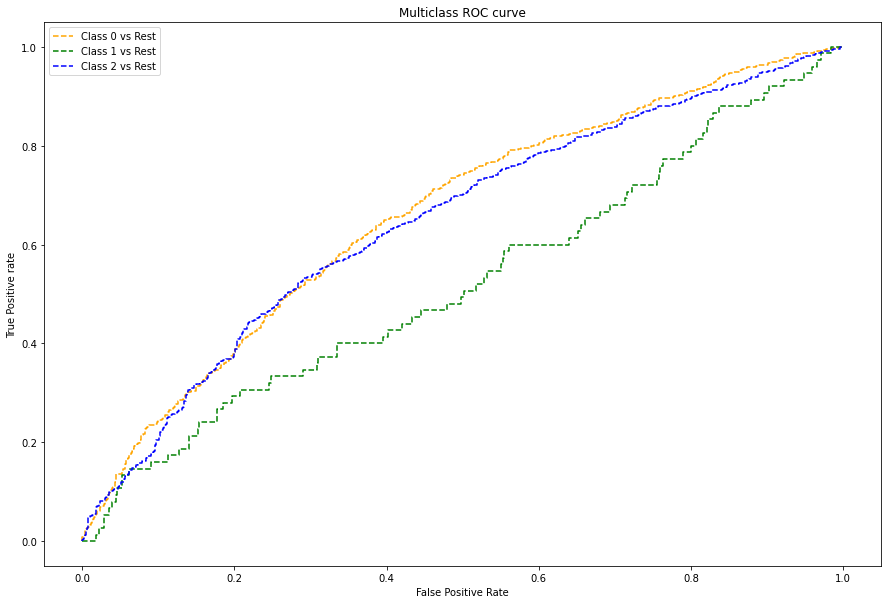

In [48]:
# roc curve for classes
plt.figure(figsize=(15,10))
clf = OneVsRestClassifier(LogisticRegression(max_iter = 10000))
clf.fit(x_train_res, y_train_res)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300);    

In [49]:
y_pred_test

array([2, 0, 2, ..., 2, 1, 0])

In [50]:
predictions = logreg.predict_proba(x_test)
y_classes = predictions.argmax(axis=-1)
cf_matrix = confusion_matrix(y_test, y_classes)
cf_matrix

array([[409, 179, 190],
       [ 31,  24,  20],
       [322, 335, 490]])

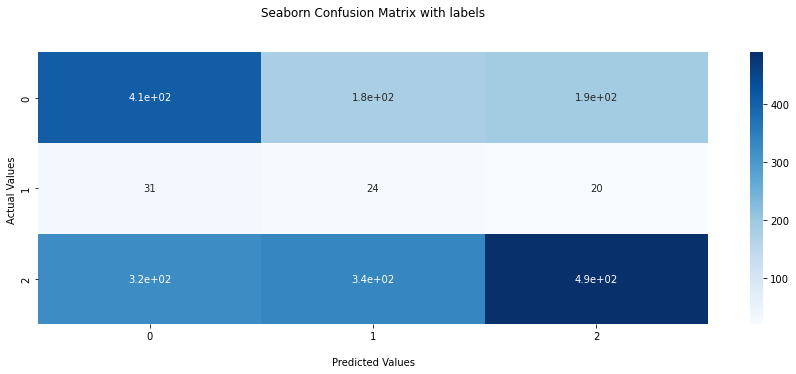

In [51]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n'); 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [52]:
#need to change the theshold
y_pred_test = logreg.predict_proba(x_test)

In [53]:
y_pred_test

array([[0.28356063, 0.25088047, 0.4655589 ],
       [0.34454649, 0.33276086, 0.32269265],
       [0.08514872, 0.33297679, 0.58187449],
       ...,
       [0.32921655, 0.29844594, 0.3723375 ],
       [0.23615139, 0.49821774, 0.26563087],
       [0.46563812, 0.25806959, 0.27629229]])

In [54]:
probability_df = pd.DataFrame(columns=['Bronze', 'Gold', 'Silver'])
probability_df['Bronze'] = y_pred_test[:,0]
probability_df['Gold'] = y_pred_test[:,1]
probability_df['Silver'] = y_pred_test[:,2]

In [61]:
probability_df

,Bronze,Gold,Silver
0,0.283561,0.250880,0.465559
1,0.344546,0.332761,0.322693
2,0.085149,0.332977,0.581874
3,0.212267,0.438142,0.349591
4,0.327643,0.362366,0.309991
...,...,...,...
1995,0.385884,0.173394,0.440722
1996,0.206085,0.515681,0.278235
1997,0.329217,0.298446,0.372338
1998,0.236151,0.498218,0.265631


In [57]:
# threshold_pred = []
# for i in range(len(probability_df)):
#     if  0.011388 <= probability_df.loc[i].Gold <= 0.086523 :
#         threshold_pred.append(1)
#     elif  0.106297 <= probability_df.loc[i].Bronze <= 0.497589:
#         threshold_pred.append(0)
#     else:
#         threshold_pred.append(2)

In [58]:
# # evaluate each threshold
# scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

In [59]:
len(probability_df)

2000

In [60]:
probability_df.loc[0]

Bronze    0.283561
Gold      0.250880
Silver    0.465559
Name: 0, dtype: float64